In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

2024-06-03 16:18:10.333400: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-03 16:18:10.370046: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 16:18:10.992862: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
mainDIR = os.listdir('./chest_xray')
print(mainDIR)
train_folder = './chest_xray/train/'
val_folder = './chest_xray/val/'
test_folder = './chest_xray/test/'

#train
os.listdir(train_folder)
train_n = train_folder + 'NORMAL/'
train_p = train_folder + 'PNEUMONIA/'

#Normal pic
print(len(os.listdir(train_n)))
rand_norm = np.random.randint(0, len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title : ', norm_pic)
norm_pic_address = train_n + norm_pic

#Pneumonia
rand_p = np.random.randint(0, len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_norm]
sic_address = train_p + sic_pic
print('pneumonia picture title : ', sic_pic)

['train', 'val', 'test', '__MACOSX', 'chest_xray']
1341
normal picture title :  NORMAL2-IM-0894-0001.jpeg
pneumonia picture title :  person33_bacteria_175.jpeg


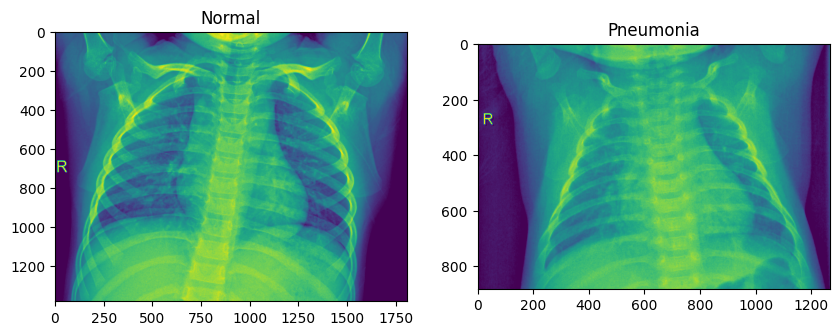

In [5]:
# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

# Let's plt these images
f = plt.figure(figsize = (10, 6))
a1 = f.add_subplot(1, 2, 1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')
plt.show()

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


2024-06-03 16:41:45.164327: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-03 16:41:45.167679: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,573,121 (6.00 MB)

 Trainable params: 1,573,121 (6.00 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/home/ubuntu/intro/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 155ms/step - accuracy: 0.7198 - loss: 1.1758 - val_accuracy: 0.8125 - val_loss: 0.4423
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.4423
Epoch 3/10


2024-06-03 16:42:12.321405: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-06-03 16:42:12.334299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 16:42:12.423664: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 156ms/step - accuracy: 0.8744 - loss: 0.2971 - val_accuracy: 0.7500 - val_loss: 0.4656
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.4656
Epoch 5/10


2024-06-03 16:42:38.989821: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 16:42:38.998749: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 16:42:39.089405: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 26s 153ms/step - accuracy: 0.8705 - loss: 0.2960 - val_accuracy: 0.6250 - val_loss: 0.7983
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.7983
Epoch 7/10


2024-06-03 16:43:05.144375: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 16:43:05.152974: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 16:43:05.238108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 25s 149ms/step - accuracy: 0.8818 - loss: 0.2819 - val_accuracy: 0.7500 - val_loss: 0.5183
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.5183
Epoch 9/10


2024-06-03 16:43:30.542607: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 16:43:30.551003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 16:43:30.650702: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 26s 153ms/step - accuracy: 0.8942 - loss: 0.2648 - val_accuracy: 0.9375 - val_loss: 0.3686
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 0.3686


2024-06-03 16:43:56.716753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 16:43:56.725708: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 16:43:56.822582: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8372 - loss: 0.3470    


2024-06-03 16:43:59.316260: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


The testing accuracy is : 83.65384340286255 %
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step


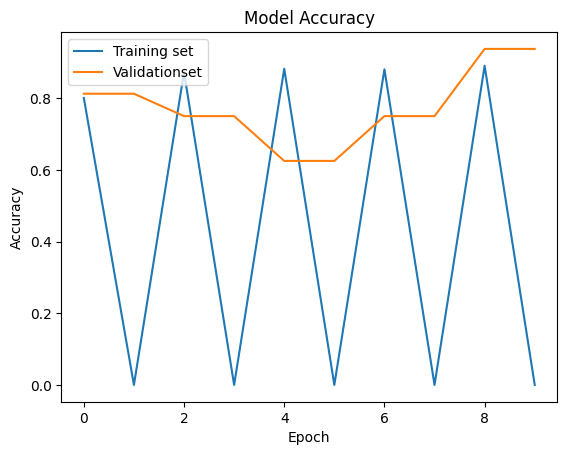

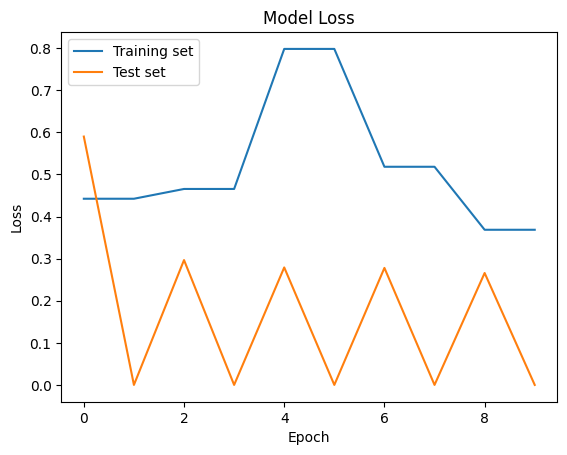

<Figure size 640x480 with 0 Axes>

In [9]:
model_in = Input(shape = (64, 64, 3))
model = Flatten()(model_in)
# Fully Connected Layers
model = Dense(activation = 'relu', units = 128) (model)
model = Dense(activation = 'sigmoid', units = 1)(model)
# Compile the Neural network
model_fin = Model(inputs=model_in, outputs=model)
model_fin.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
#Image normalization.

training_set = train_datagen.flow_from_directory('./chest_xray/train',target_size = (64, 64),batch_size = 32,class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory('./chest_xray/val/',target_size=(64, 64),batch_size=32,class_mode='binary')
test_set = test_datagen.flow_from_directory('./chest_xray/test',target_size = (64, 64),batch_size = 32,class_mode = 'binary')
model_fin.summary()

cnn_model = model_fin.fit(training_set,steps_per_epoch = 163,epochs = 10,validation_data = validation_generator,validation_steps = 624)
test_accu = model_fin.evaluate(test_set,steps=624)
model_fin.save('medical_ann.h5')


print('The testing accuracy is :',test_accu[1]*100, '%')
Y_pred = model_fin.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)
max(y_pred)

plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validationset'], loc='upper left')
plt.savefig('train_accuracy.png')
plt.show(block=False)
plt.clf()

plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'],loc='upper left')
plt.savefig('train_loss.png')
plt.show(block=False)
plt.clf()